# Project: Investigate data from The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data in this analysis is taken from The Movie Database (TMDb) which contains information about 10,000 movies. The information includes  general information like popularity, cast, crew, homepage address, tag line, prominent keywords, genres, production date, plot and an overview of the respective movie. Financial information includes like the budget and revenue along with their values for the year of 2010 (accounting inflation over time for the individual movies). It also includes important time related information like release date and year.

In this analysis an attempt is made to answer following questions based on the data:

    1. Which genre of movies has been most popular in the past years?
    2. What is the trend of movie budget in the previous years?
    3. What is the relation between revenue generated and rating of movies?
    4. What is relation between movie budget and runtime of movies?
   

In [1]:
# Import packages to be used in the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The data needs to loaded into panda's dataframe before we begin our analysis:

In [2]:
# Load data for analysis from csv file and print first 3 lines
df = pd.read_csv("tmdb-movies.csv")

To get a general idea of how our data looks, print first few rows of our dataset:

In [3]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


It is important to know the structure of out dataset for our analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Here it can seen that the dataset has 21 columns with maximum 10866 entries.

Also there are few columns that have missing entries, to be specific: **cast**, **homepage**, **director**, **taglin**, **keywords**, **genres** and **production_companies**. 

Also, **release_date** is in string format. There is no need to convert **release_date** as it will not be used in the analysis.

**release_year** is in integer, which is in accordance with the requirement.



### Data Cleaning 

Removing all the columns that will not used in the analysis in order to make working with dataset more convenient. Columns like **id**, **imbd_id**,**homepage**, **tagline**, **keywords**, and **overview** are too sepcific to individual entries and columns **director**, **cast** and **production_companies** we not be used in our analysis. Also, we will not be using **budget** and **revenue** columns, instead we will use **budget_adj** and **revenue_adj** columns which takes  inflation into account.

In [5]:
df.drop(columns=['id','imdb_id','budget','revenue',
                 'cast','homepage','director','tagline','keywords',
                 'overview','production_companies','release_date'],inplace = True)

Confirming the required changes where made to the dataset:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10866 non-null  int64  
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
 7   budget_adj      10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


Here, it can be seen that **genres** is missing some entries. Since this column will be used for only one analysis, I it better to clean it at that step.

Counting average vote count of the dataset:

In [7]:
df.vote_count.mean()

217.38974783729063

Thus an average of around 217 votes were counted per movie.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genre of movies has been most popular in the past years?

This analysis only requires three columns: **release_year**, **generes** and **popularity**. It is more convenient to make a seperate dataframe to answer this question.

In [8]:
df_pop = df[['release_year','genres','popularity']]

Checking the copy of original dataframe:

In [9]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  10866 non-null  int64  
 1   genres        10843 non-null  object 
 2   popularity    10866 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 254.8+ KB


The **genres** column is misssing some data.

Checking how many entries in **genres** columnn are missing:

In [10]:
df_pop.genres.isna().sum()

23

Since the number of null values is very less as compared to side of dataset, we can remove the rows with null values.

In [11]:
df_pop.dropna(inplace = True)

Checking the size of altered database

In [12]:
df_pop.shape

(10843, 3)

This is the expected size of alterd dataframe.

Looking at the data inside **release_year** column:

In [13]:
df_pop.release_year.describe()

count    10843.000000
mean      2001.315595
std         12.813298
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

According to this, data inside dataset is availabe from 1960 to 2016 and most of the entries are between 1995 and 2011

Column **genres**, contain multiple values separated by pipe (|) characters. In order to compare individula genres, they need to be seperated into individual columns.


In [14]:
df_pop['genres'] = df_pop['genres'].apply(lambda x: x.split("|"))
df_pop = df_pop.explode('genres')

Checking the new datafram:

In [15]:
df_pop.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


Checking number of unique generes and their values:

In [16]:
df_pop['genres'].nunique()

20

In [17]:
df_pop['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

Calculating mean popularity for each genres of movies for each year:

In [18]:
df_pop_mean = df_pop.groupby(['release_year','genres'],as_index=False).mean()

In [19]:
df_pop_mean

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346479
4,1960,Drama,0.566305
...,...,...,...
1044,2015,Science Fiction,2.245603
1045,2015,TV Movie,0.260574
1046,2015,Thriller,1.401877
1047,2015,War,1.284511


Selecting the maximum genre for each year

In [20]:
for x in df_pop_mean['release_year']:
    df_max_pop = df_pop_mean.groupby('release_year').max()

In [21]:
df_max_pop.head()

,genres,popularity
release_year,,
1960,Western,0.811910
1961,Western,2.631987
1962,Western,0.942513
1963,Western,2.180410
1964,Western,0.930959


Checking which genres have been most popular:

In [22]:
df_max_pop.genres.value_counts()

Western    50
War         6
Name: genres, dtype: int64

Representing the finding through a pie chart

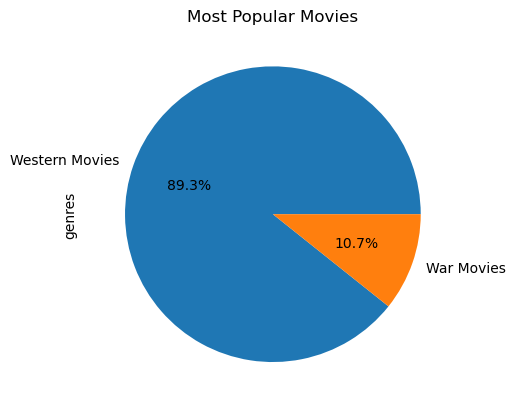

In [23]:
mylabels = ["Western Movies","War Movies"]

df_max_pop.genres.value_counts().plot.pie(labels = mylabels,autopct='%1.1f%%',title="Most Popular Movies");

Here it can be the the genre of movies that have been most prominent in terms of popularity has been Western Movies and War Movies in the span of time between 1960 and 2015 with Western movies being most popular most of the times (89.3%) and War movies being most popular rest of the times (10.7%).





### Research Question 2: What is the trend of movie budget in the previous years?

This analysis requires only two columns **release_year** and **budget_adj**. Thus, it is more convenient to make a subset of the dataset and work with it for this analysis/.

In [24]:
df_bud = df[['release_year','budget_adj']]

Checking the new dataframe:

In [25]:
df_bud.head()

,release_year,budget_adj
0,2015,1.379999e+08
1,2015,1.379999e+08
2,2015,1.012000e+08
3,2015,1.839999e+08
4,2015,1.747999e+08


Grouping the data by release_year and calculating average budget for each year:

In [26]:
df_bud =  df_bud.groupby('release_year',as_index=False).mean()

In [27]:
df_bud.head()

,release_year,budget_adj
0,1960,5.082036e+06
1,1961,1.085687e+07
2,1962,1.232693e+07
3,1963,1.535687e+07
4,1964,6.608980e+06


Further investigating average movie budget for corresponding years:

In [28]:
df_bud.describe()

,release_year,budget_adj
count,56.000000,5.600000e+01
mean,1987.500000,1.557286e+07
std,16.309506,7.326740e+06
min,1960.000000,4.729510e+06
25%,1973.750000,1.088323e+07
50%,1987.500000,1.390314e+07
75%,2001.250000,1.795055e+07
max,2015.000000,3.369195e+07


Finding years in which the average spending on movie making was maximum and minimum:

In [29]:
df_bud[df_bud['budget_adj']==df_bud['budget_adj'].min()]

,release_year,budget_adj
12,1972,4.729510e+06


In [30]:
df_bud[df_bud['budget_adj']==df_bud['budget_adj'].max()]

,release_year,budget_adj
39,1999,3.369195e+07


Ploting a line graph for visualizing our analysis:

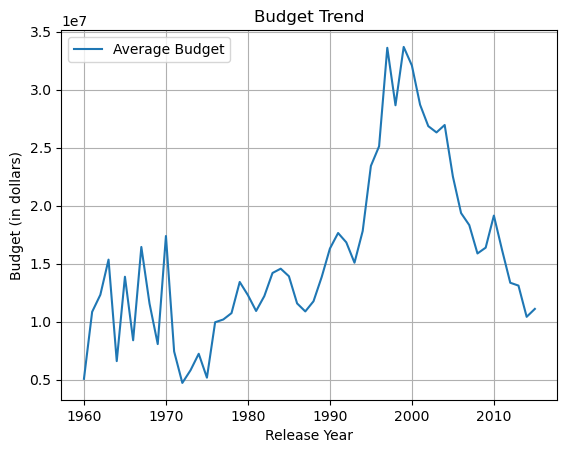

In [31]:
df_bud.plot.line(x='release_year',y='budget_adj',xlabel = 'Release Year',ylabel = 'Budget (in dollars)',label = 'Average Budget',
                 title='Budget Trend',grid=True, legend = True);

Here we can see that minimum value of average spending on a movie was in the year 1972 (\\$4.7 million) and maximum was in the year 1999 (\\$33.7 million).

The plot is very volatile form the year 1960 to 1970 with shape increase and decrease in investments.

There was a gradual increase in budget from 1972 to 1999 with average spending reaching it maximum value in the year 199 and then there is a gradual decrease on spending in movies till the year 2015 (end of the dataset).

### Research Question 3:  What is the relation between revenue generated and rating of movies?

In this analysis only two columns are required: **vote_average** and **revenue_adj**. Thus, it is more convenient to make a subset of the dataframe and use it for analysis:

In [32]:
df_rev = df[['vote_average','revenue_adj']]

Further exploring the data:

In [33]:
df_rev.info()
df_rev.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vote_average  10866 non-null  float64
 1   revenue_adj   10866 non-null  float64
dtypes: float64(2)
memory usage: 169.9 KB


,vote_average,revenue_adj
count,10866.000000,1.086600e+04
mean,5.974922,5.136436e+07
std,0.935142,1.446325e+08
min,1.500000,0.000000e+00
25%,5.400000,0.000000e+00
50%,6.000000,0.000000e+00
75%,6.600000,3.369710e+07
max,9.200000,2.827124e+09


Here it can seen that vote value ranges from 1.5 to 9.2 with most of the values between 5.4 and 6.6.

Also, the revenue generated from the movies ranges from \\$0.0  to \\$2.83 billion  with most of the movies budget betweem \\$0 and \\$33.7 million.

Here it is assumed that movies with \\$0 budjet are **Zero Budget Movies**.

Scatter plot of Average Vote vs Revenue generated by the movies to draw relation between both of them:

(Since it is required to plot similar kind of scatter plots multiple time, it is more convenient to define a function for this and use it as per the requirement)

In [34]:
# Create scatter plots function
def plot_scatter(da_fra, x_value, y_value, x_lab , y_lab):
    da_fra.plot(kind = 'scatter',x= x_value, y = y_value, xlabel = x_lab , ylabel = y_lab ,figsize=(5,5) ,c = 'red')
    

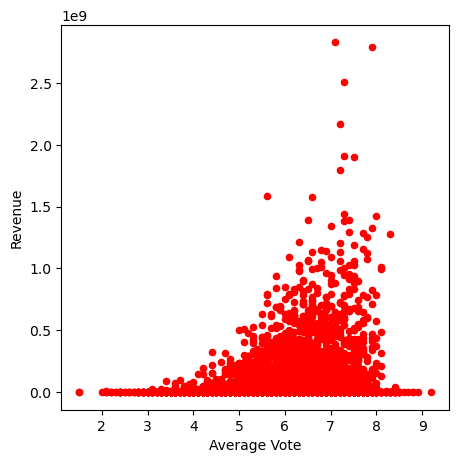

In [35]:
plot_scatter(df_rev,'vote_average','revenue_adj','Average Vote','Revenue')

Here it can be seen that there is clear positive corelation between the revenue generated from the movies and average vote recieved by the movie. This implies movies with better votes tends to generate better revenues.

### Research Question 4: What is the relation between budget and runtime of movie?

This anlysis only requires only two columns: **runtime** and **budget_adj**. Thus, it is more convenient to make subset of the dataframe and use it for our analysis;

In [36]:
df_run = df[['runtime','budget_adj']]

In [37]:
df_run.head()

,runtime,budget_adj
0,124,1.379999e+08
1,120,1.379999e+08
2,119,1.012000e+08
3,136,1.839999e+08
4,137,1.747999e+08


Further exploring the dataset:

In [38]:
df_run.info()
df_run.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   runtime     10866 non-null  int64  
 1   budget_adj  10866 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 169.9 KB


,runtime,budget_adj
count,10866.000000,1.086600e+04
mean,102.070863,1.755104e+07
std,31.381405,3.430616e+07
min,0.000000,0.000000e+00
25%,90.000000,0.000000e+00
50%,99.000000,0.000000e+00
75%,111.000000,2.085325e+07
max,900.000000,4.250000e+08


Like in the previous analysis \\$0 budget is assumed to be a **Zero Budget Movies**

We can see that minimum value of runtime of movies is 0 minutes. This is not possible and these entries needs to be dealt with.

Further investigating **runtime** column for number of 0 minutes values:

In [39]:
(df_run['runtime']==0).sum()

31

Thus, there are 31 number of enteries that have 0 mins of runtime. Since they are very less as compared to the total size of the dataframe, we can remove these rows:

In [40]:
df_run = df_run.query('runtime !=0')

Veryfying that the required changes were made:

In [41]:
df_run.info()
df_run.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   runtime     10835 non-null  int64  
 1   budget_adj  10835 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 253.9 KB


,runtime,budget_adj
count,10835.000000,1.083500e+04
mean,102.362898,1.760010e+07
std,30.946957,3.434284e+07
min,2.000000,0.000000e+00
25%,90.000000,0.000000e+00
50%,99.000000,0.000000e+00
75%,112.000000,2.094485e+07
max,900.000000,4.250000e+08


Here we can see that the run time fo movies ranges from 2 minutes to 900 minutes and most of the value ranging from 90 minutes to 112 minutes which is expected average lenght of movies.

Plotting a scatter plot to draw relation between movie budget and runtime.

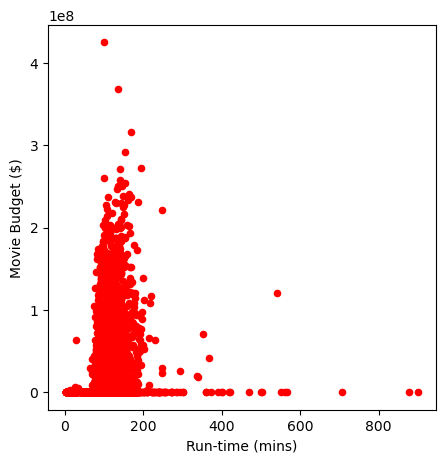

In [42]:
plot_scatter(df_run,'runtime','budget_adj','Run-time (mins)','Movie Budget (\\$)')

Here it can be seen that there is not direct coorelation between how long the movie is and how much money was spend on it's making.

The plot also verifies that most of the movies have run-time between 90 minutes and 112 minutes as well as most of the movie budget ranges from \\$0 to \\$20 million.

<a id='conclusions'></a>
## Conclusions



Following limitations were observed in the analysis:

1. The dataset was incomplete in terms of cast, homepage, director, keywords, overview, genres and production companies which affected the analysis.

3. Data was availabe for only 10865 movies, which is very less as compared to actual amount of movies officially made in the time periode.

4. Data had incorrect entries like 0 runtime for some movies.

5. An average of about 217 votes were considered per movie to rate it, which is not sufficient.    

From the analyses that we carried out, following conclusions can be drawn:

1. The genre of movies that have been most prominent in terms of popularity has been Western Movies and War Movies in the span of time between 1960 and 2015 with Western movies being most popular most of the times (89.3%) and War movies being most popular rest of the times (10.7%).

2. There was a gradual increase in budget from 1972 to 1999 with average spending reaching it maximum value in the year 199 and then there is a gradual decrease on spending in movies till the year 2015 (end of the dataset).

3. There is clear positive corelation between the revenue generated from the movies and average vote recieved by the movie. This implies movies with better votes tends to generate better revenues.

4. There is not direct coorelation between how long the movie is and how much money was spend on it's making

